In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 40)
pd.set_option('display.max_colwidth', 300)

In [12]:
beer=pd.read_csv('../data/processed/clean_styles_mapped.csv',index_col=0)
beer.head() #color=SRM

,Name,Style,StyleID,ABV,IBU,Color,Simple_style,Style_color,Style_ibu
0,Vanilla Cream Ale,Cream Ale,45,5.48,17.65,4.83,Pale Lager/Blonde Ale,1,1
2,Zombie Dust Clone - EXTRACT,American IPA,7,5.91,59.25,8.98,Pale Ale,2,5
3,Zombie Dust Clone - ALL GRAIN,American IPA,7,5.80,54.48,8.50,Pale Ale,2,5
4,Bakke Brygg Belgisk Blonde 50 l,Belgian Blond Ale,20,6.48,17.84,4.57,Pale Lager/Blonde Ale,1,1
5,Sierra Nevada Pale Ale Clone,American Pale Ale,10,5.58,40.12,8.00,Pale Ale,2,5


In [3]:
beer.describe(include='all')

,Name,Style,StyleID,ABV,IBU,Color,Simple_style,Style_color,Style_ibu
count,59716,59716,59716.000000,59716.000000,59716.000000,59716.000000,59716,59716.000000,59716.000000
unique,48038,79,NaN,NaN,NaN,NaN,6,NaN,NaN
top,Awesome Recipe,American IPA,NaN,NaN,NaN,NaN,Pale Ale,NaN,NaN
freq,1046,11940,NaN,NaN,NaN,NaN,30835,NaN,NaN
mean,NaN,NaN,51.285635,6.124870,46.526609,13.106287,NaN,2.230106,3.565996
std,NaN,NaN,55.610452,1.769186,42.355443,12.325109,NaN,1.394857,1.822680
min,NaN,NaN,4.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000
25%,NaN,NaN,7.000000,5.090000,24.980000,5.010000,NaN,1.000000,1.000000
50%,NaN,NaN,20.000000,5.790000,37.535000,7.770000,NaN,2.000000,5.000000
75%,NaN,NaN,90.000000,6.810000,58.760000,15.270000,NaN,2.000000,5.000000


In [4]:
beer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59716 entries, 0 to 73860
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          59716 non-null  object 
 1   Style         59716 non-null  object 
 2   StyleID       59716 non-null  int64  
 3   ABV           59716 non-null  float64
 4   IBU           59716 non-null  float64
 5   Color         59716 non-null  float64
 6   Simple_style  59716 non-null  object 
 7   Style_color   59716 non-null  int64  
 8   Style_ibu     59716 non-null  int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 4.6+ MB


<Axes: >

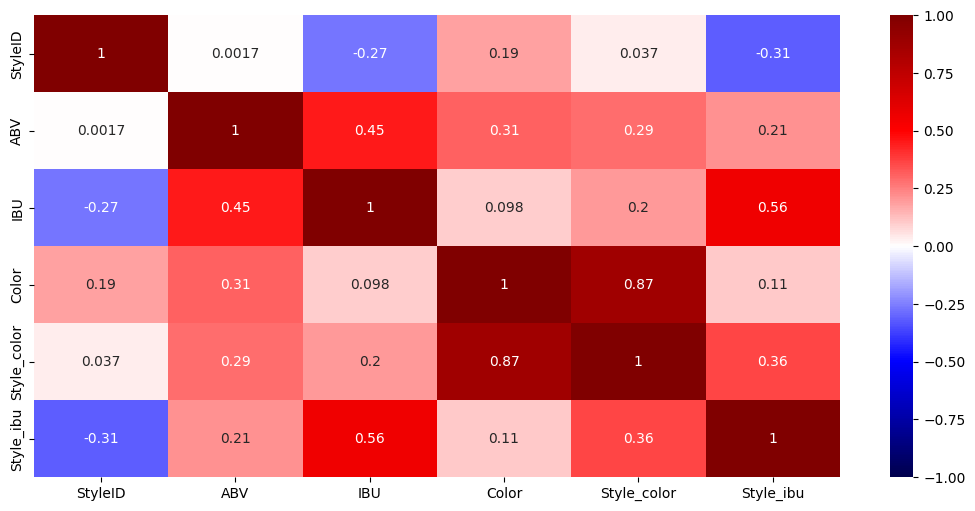

In [32]:
#pearson
plt.figure(figsize=(13,6))
sns.heatmap(beer.corr(method='pearson',numeric_only=True),cmap='seismic',annot=True,vmin=-1)

<Axes: >

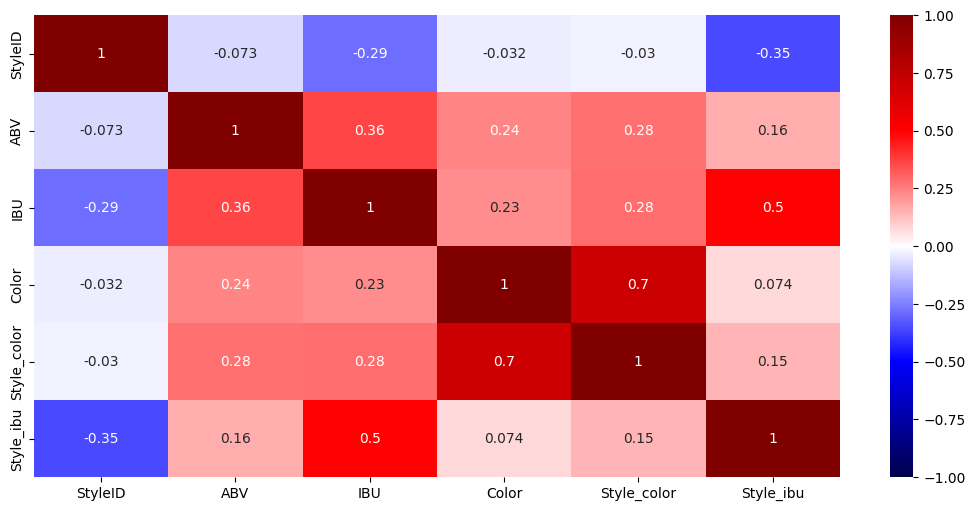

In [33]:
#kendall
plt.figure(figsize=(13,6))
sns.heatmap(beer.corr(method='kendall',numeric_only=True),cmap='seismic',annot=True,vmin=-1)

In [12]:
beer.columns

Index(['Name', 'Style', 'StyleID', 'ABV', 'IBU', 'Color', 'Simple_style',
       'Style_code'],
      dtype='object')

In [26]:
beer.groupby('Simple_style')[['ABV','IBU','Color']].mean().reset_index().sort_values(by='Simple_style')

,Simple_style,ABV,IBU,Color
0,Brown Ale,5.598211,28.810953,22.356060
1,Pale Ale,6.155878,54.015643,8.472880
2,Pale Lager/Blonde Ale,5.028702,20.120539,4.047743
3,Stout/Porter,6.818976,46.055499,37.568880
4,Strong Ale,8.477804,44.716198,16.056057
5,Wheat,5.131178,17.906383,4.324667


<Axes: xlabel='Simple_style', ylabel='Color'>

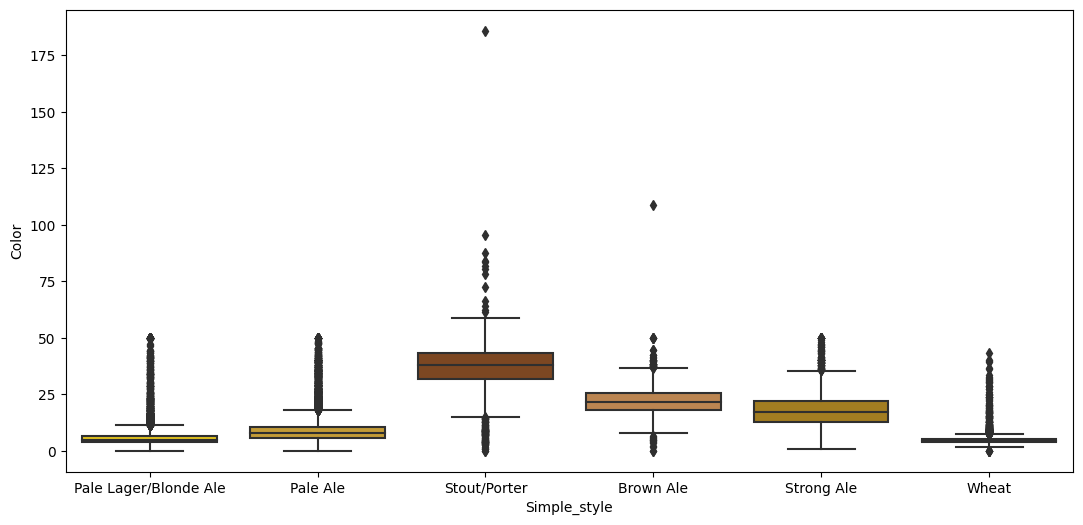

In [22]:
plt.figure(figsize=(13,6))
sns.boxplot(beer,y='Color',x='Simple_style',palette=['gold','goldenrod','saddlebrown','peru','darkgoldenrod'])

(0.0, 400.0)

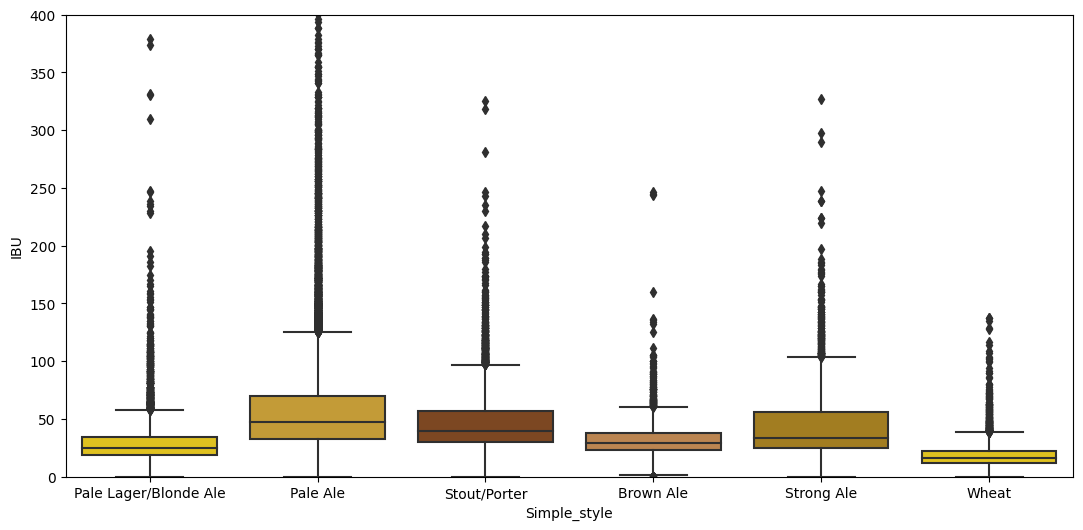

In [20]:
plt.figure(figsize=(13,6))
sns.boxplot(beer,y='IBU',x='Simple_style', palette=['gold','goldenrod','saddlebrown','peru','darkgoldenrod'])#,'lemmonchiffon'])
plt.ylim(0,400)
# plt.

<Axes: xlabel='Simple_style', ylabel='ABV'>

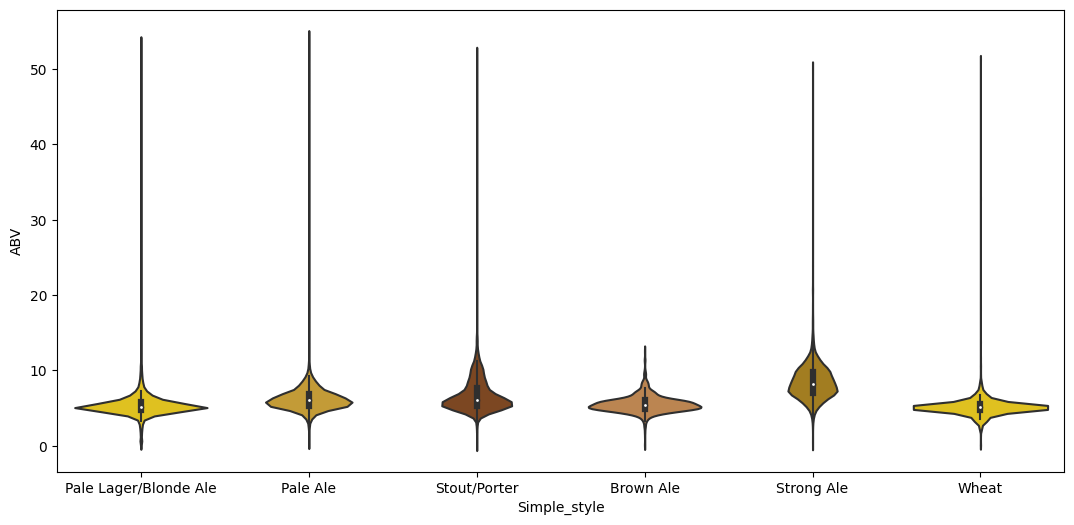

In [5]:
plt.figure(figsize=(13,6))
sns.violinplot(beer,y='ABV',x='Simple_style',palette=['gold','goldenrod','saddlebrown','peru','darkgoldenrod'])

In [6]:
beerd_stats=beer.groupby(['Simple_style'])[['ABV','IBU','Color',]].median().sort_values(by='Simple_style')
beerd_stats

,ABV,IBU,Color
Simple_style,,,
Brown Ale,5.42,29.08,21.36
Pale Ale,6.01,48.01,7.39
Pale Lager/Blonde Ale,5.17,24.88,4.62
Stout/Porter,6.10,38.89,37.65
Strong Ale,8.22,33.76,17.12
Wheat,5.09,16.24,4.05


### Let's check if the values in the DF match the 'definitions' from [Brewersfriend.com](https://www.brewersfriend.com/beer-charts/) and the limit values they stablish for each beer style.

#### Remove duplicated beers

In [20]:
beer=beer.drop_duplicates(subset='Name')

In [21]:
beer['Simple_style'].value_counts()

Simple_style
Pale Ale                 25331
Stout/Porter              6857
Pale Lager/Blonde Ale     5698
Wheat                     3660
Strong Ale                2483
Brown Ale                 1619
Name: count, dtype: int64

#### Remove and correct outliers (wrong values)

Bear in mind that amateur users uploaded their own values, which sometimes do not correspond to the actual standards they should follow.

In [ ]:
# beer.loc[beer['IBU'].idxmax()] #remove outlier
# beer = beer[beer['IBU'] != 3409.3]

In [22]:
#CORRECT LAGERS WITH WRONG COLOR (outliers)
beer.loc[(beer['Simple_style'] == 'Pale Lager/Blonde Ale') & (beer['Color'] > 6), 'Color'] = 6

# beer = beer.drop(beer[(beer['Simple_style'] == 'Pale Lager/Blonde Ale') & (beer['Color'] > 6)].index)

In [11]:
# beere.loc[beere['IBU'].idxmax()] #remove outlier
# beere = beere[beere['IBU'] != 3409.3]

In [23]:
#CORRECT WRONG IBU FOR BLONDE ALES/LAGERS
beer.loc[(beer['Simple_style'] == 'Pale Lager/Blonde Ale') & (beer['IBU'] > 28), 'IBU'] = 28

#plan b would be to drop them
# beere = beere.drop(beere[(beere['Simple_style'] == 'Pale Lager/Blonde Ale') & (beere['IBU'] > 28)].index)

In [24]:
beer['Simple_style'].value_counts()

Simple_style
Pale Ale                 25331
Stout/Porter              6857
Pale Lager/Blonde Ale     5698
Wheat                     3660
Strong Ale                2483
Brown Ale                 1619
Name: count, dtype: int64

In [15]:
# beere.loc[beere['ABV'].idxmin()]

Remove ABV outlier and missing values stored as zero

In [16]:
# beere.loc[beere['ABV'].idxmax()] #drop outlier

In [25]:
beer = beer[beer['ABV'] != 54.72]
beer = beer[(beer['ABV'] != 0.0) & (beer['IBU'] != 0.0) & (beer['Color'] != 0.0)]

In [26]:
#SET ABV LIMIT FOR SEVERAL TYPES
beer.loc[(beer['Simple_style'] == 'Strong Ale') & (beer['ABV'] < 6), 'ABV'] = 6
# beere.loc[(beere['Simple_style'] == 'Stout/Porter') & (beere['ABV'] > 12), 'ABV'] = 12

beer.loc[(beer['Simple_style'] == 'Pale Lager/Blonde Ale') & (beer['ABV'] > 6.5), 'ABV'] = 6.4

#SET COLOR LIMIT FOR PALE ALES
beer.loc[(beer['Simple_style'] == 'Pale Ale') & (beer['Color'] > 15), 'Color'] = 15
beer.loc[(beer['Simple_style'] == 'Pale Ale') & (beer['Color'] < 5), 'Color'] = 5

In [34]:
#SET IBU LIMIT FOR SEVERAL STYLES
beer.loc[(beer['Simple_style'] == 'Pale Ale') & (beer['IBU'] > 100), 'IBU'] = 90
beer.loc[(beer['Simple_style'] == 'Stout/Porter') & (beer['IBU'] > 90), 'IBU'] = 90
beer.loc[(beer['Simple_style'] == 'Stout/Porter') & (beer['IBU'] < 18), 'IBU'] = 18
beer.loc[(beer['Simple_style'] == 'Strong Ale') & (beer['IBU'] < 20), 'IBU'] = 20
beer.loc[(beer['Simple_style'] == 'Strong Ale') & (beer['IBU'] > 100), 'IBU'] = 100
beer.loc[(beer['Simple_style'] == 'Wheat') & (beer['IBU'] > 30), 'IBU'] = 30
beer.loc[(beer['Simple_style'] == 'Pale Lager/Blonde Ale') & (beer['IBU'] < 8), 'IBU'] = 8
beer.loc[(beer['Simple_style'] == 'Pale Ale') & (beer['IBU'] < 30), 'IBU'] = 30

In [35]:
#SET COLOR LIMIT FOR SEVERAL STYLES (according to brewfriend.com)
beer.loc[(beer['Simple_style'] == 'Wheat') & (beer['Color'] > 6), 'Color'] = 6
beer.loc[(beer['Simple_style'] == 'Strong Ale') & (beer['Color'] > 22), 'Color'] = 22
beer.loc[(beer['Simple_style'] == 'Brown Ale') & (beer['Color'] < 12), 'Color'] = 12
beer.loc[(beer['Simple_style'] == 'Stout/Porter') & (beer['Color'] < 17), 'Color'] = 17

In [39]:
beerd_stats=beer.groupby('Simple_style')[['ABV','IBU','Color',]].median().sort_values(by='Simple_style')
beerd_stats

,ABV,IBU,Color
Simple_style,,,
Brown Ale,5.44,29.730,21.570
Pale Ale,6.01,49.455,7.400
Pale Lager/Blonde Ale,5.06,25.390,4.000
Stout/Porter,6.15,40.040,37.805
Strong Ale,8.27,34.670,17.160
Wheat,5.10,16.720,4.070


In [42]:
#Reset the index due to the dropped rows
beer.reset_index(drop=True, inplace=True)

In [43]:
beer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43829 entries, 0 to 43828
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          43829 non-null  object 
 1   Style         43829 non-null  object 
 2   StyleID       43829 non-null  int64  
 3   ABV           43829 non-null  float64
 4   IBU           43829 non-null  float64
 5   Color         43829 non-null  float64
 6   Simple_style  43829 non-null  object 
 7   Style_color   43829 non-null  int64  
 8   Style_ibu     43829 non-null  int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 3.0+ MB


In [44]:
# beer.to_csv('../data/processed/clean_limited.csv')

In [48]:
beer['Style_color'][beer['Style_color'].isna()]

Series([], Name: Style_color, dtype: int64)